<a href="https://colab.research.google.com/github/myller-silva/SO-trabalho-03-paginacao/blob/main/trabalho_03_SO_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
def fifo(referencias_as_paginas, qtd_molduras):
  molduras = []
  faltas_de_pagina = 0

  for pagina in referencias_as_paginas:
    if pagina not in molduras:
      faltas_de_pagina += 1
      if len(molduras) == qtd_molduras:
        molduras.pop(0)  # Remove a página mais antiga
      molduras.append(pagina)

  return faltas_de_pagina


In [245]:
def aging(referencias_as_paginas, qtd_molduras):
    molduras = []  # Lista para armazenar as páginas nas molduras
    idade_paginas = []  # Lista para armazenar a idade das páginas
    faltas_de_pagina = 0  # Contador de faltas de página

    for pagina in referencias_as_paginas:
        if pagina in molduras:
            # Atualiza a idade da página existente
            indice_pagina = molduras.index(pagina)
            idade_paginas[indice_pagina] >>= 1  # Desloca os bits para a direita (envelhecimento)
            idade_paginas[indice_pagina] |= 1 << (qtd_molduras - 1)  # Define o bit mais significativo como 1 (referência recente)
        else:
            # Incrementa o contador de faltas de página
            faltas_de_pagina += 1

            if len(molduras) == qtd_molduras:
                # Encontra a página com a menor idade
                indice_pagina_a_remover = idade_paginas.index(min(idade_paginas))
                # Substitui a página na moldura
                molduras[indice_pagina_a_remover] = pagina
                idade_paginas[indice_pagina_a_remover] = 1 << (qtd_molduras - 1)  # Define o bit mais significativo como 1 (nova página)
            else:
                # Adiciona a nova página à lista de molduras
                molduras.append(pagina)
                idade_paginas.append(1 << (qtd_molduras - 1))  # Define o bit mais significativo como 1 (nova página)

    return faltas_de_pagina


In [246]:
import random
import math

qtd_referencias = 1000

aging_acumulate = []
fifo_acumulate = []
qtd_paginas = 64
paginas  = [i for i in range(qtd_paginas)]

referencias_as_paginas = random.choices(paginas, k=qtd_referencias)

tamanho_molduras = [2**i for i in range(int(math.log2(qtd_paginas)))]

for tamanho_moldura in tamanho_molduras:
  aging_acumulate.append(aging(referencias_as_paginas, tamanho_moldura))
  fifo_acumulate.append(fifo(referencias_as_paginas, tamanho_moldura))



In [247]:
tamanho_molduras

[1, 2, 4, 8, 16, 32]

In [248]:
aging_acumulate

[984, 971, 934, 873, 741, 506]

In [249]:
fifo_acumulate

[984, 965, 941, 894, 753, 516]

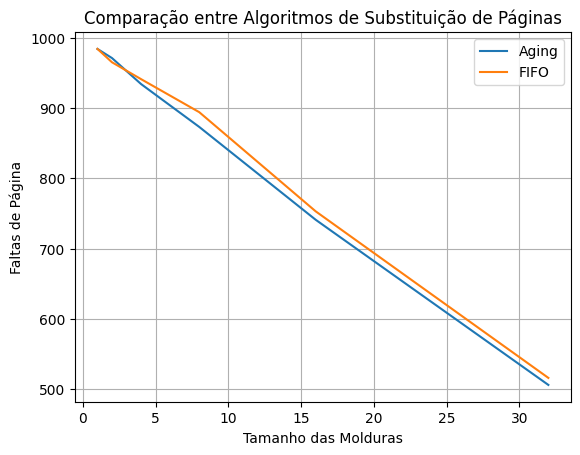

In [250]:
import matplotlib.pyplot as plt

# Dados
x = tamanho_molduras
y1 = aging_acumulate
y2 = fifo_acumulate

# Cria o gráfico
plt.plot(x, y1, label='Aging')
plt.plot(x, y2, label='FIFO')

# Configurações do gráfico
plt.xlabel('Tamanho das Molduras')
plt.ylabel('Faltas de Página')
plt.title('Comparação entre Algoritmos de Substituição de Páginas')
plt.legend()
plt.grid(True)

# Exibe o gráfico
plt.show()


In [251]:
x

[1, 2, 4, 8, 16, 32]